In [1]:
#imports
import numpy as np
import astropy 
from astropy.io import ascii
from astropy.table import Table, Column, join, vstack
from astropy.coordinates import angles
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

## Taurus:

In [2]:
#read in files and find Koenig selected class I's and II's
esplin = ascii.read('../../KoenigSelectedCatalogs/Taurus/EsplinFewColumns.txt')
taurus = ascii.read('../../KoenigSelectedCatalogs/Taurus/finalTaurusSelection_withWISE_APOGEELimits.txt')
tauresp = ascii.read('../../KoenigSelectedCatalogs/Taurus/finalTaurusSelection_withEsplin.txt')

taurusI = (taurus['Class']=="I").nonzero()
taurusII = (taurus['Class']=="II").nonzero()


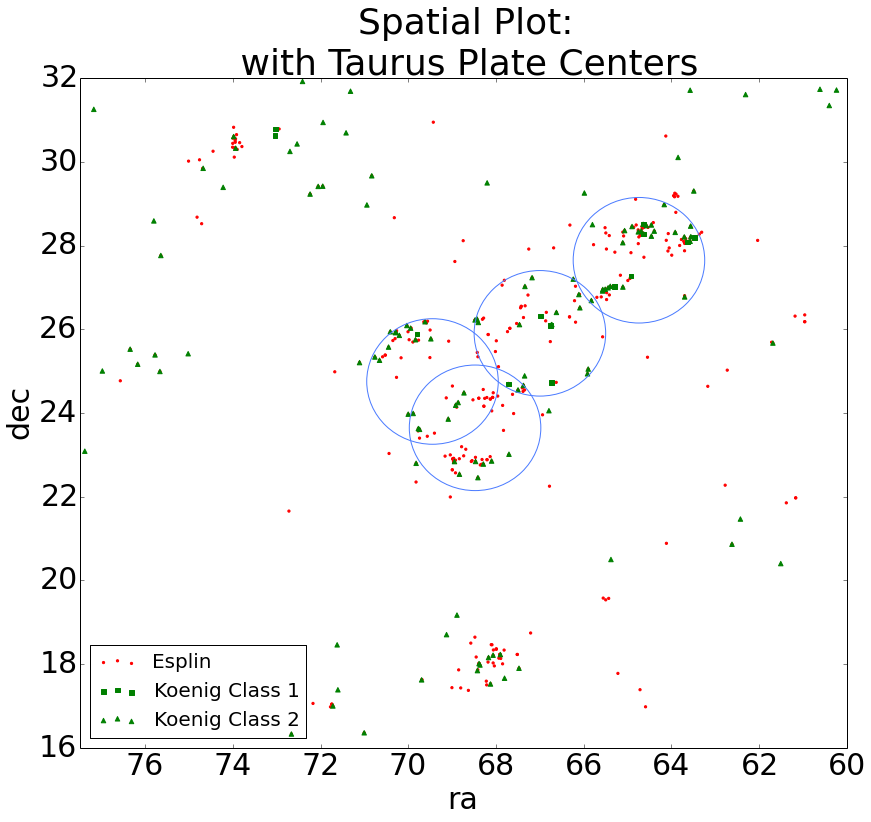

In [3]:
#Plot selected sources with the plate centers
plt.scatter(esplin['ra'], esplin['dec'], marker = '.', color = 'red')
plt.scatter(taurus['ra'][taurusI], taurus['dec'][taurusI], marker = 's', color = 'green')
plt.scatter(taurus['ra'][taurusII], taurus['dec'][taurusII], marker = '^', color = 'green')
plt.legend(('Esplin', 'Koenig Class 1', 'Koenig Class 2'), loc=3, fontsize = 20)

circle1=plt.Circle((64.74, 27.65), 1.5, color='#4c7cff', fill = False)
circle2=plt.Circle((66.999, 25.904),1.5,color='#4c7cff', fill = False)
circle3=plt.Circle((69.449, 24.753),1.5,color='#4c7cff', fill = False)
circle4=plt.Circle((68.478, 23.646),1.5,color='#4c7cff', fill = False)


fig = plt.gcf()
fig.gca().add_artist(circle1)
fig.gca().add_artist(circle2)
fig.gca().add_artist(circle3)
fig.gca().add_artist(circle4)

plt.title('Spatial Plot: \n with Taurus Plate Centers')
plt.xlim(77.5,60)
plt.ylim(16, 32)
plt.xlabel('ra')
plt.ylabel('dec')

plt.rc('font', size = 30)
fig.set_size_inches(13.75, 12)
#fig.savefig('../../KoenigSelectedCatalogs/Taurus/Koenig_Esplin_Plate_Centers.pdf')

In [7]:
# count the number of sources inside a plate, given the plate center
from astropy import units as u
from astropy.coordinates import SkyCoord  

PlateRA = [64.74, 66.999, 69.449, 68.478]
PlateDEC = [27.65, 25.904, 24.753, 23.646]
totalPlate = []

for i in range(len(PlateRA)):
    cenRa = PlateRA[i]
    cenDec = PlateDEC[i]
    c1 = SkyCoord(cenRa, cenDec, unit='deg')

    total = 0
    for i in range(len(tauresp)):
        c2 = SkyCoord(tauresp['ra'][i], tauresp['dec'][i], unit = 'deg')
        if (c1.separation(c2).degree <=1.5):
            total = total +1
            
    totalPlate.append(total)     
            
output = open('../../KoenigSelectedCatalogs/Taurus/Taurus+Esplin_PlateCount.txt', 'w')
output.write('Plate_Ra\tPlate_Dec\tSourceCount')
for i in range(len(PlateRA)):
    line = str(PlateRA[i])+'\t'+str(PlateDEC[i])+'\t'+str(totalPlate[i])
    output.write(line)
    
output.close()

In [8]:

plateI = []
plateII = []

#for i in taurusI[0]:
    #c2 = SkyCoord(taurus['ra'][i], taurus['dec'][i], unit = 'deg')
    #if (c1.separation(c2).degree <=1.5):
        #plateI.append(i)
        
#for i in taurusII[0]:
    #c2 = SkyCoord(taurus['ra'][i], taurus['dec'][i], unit = 'deg')
    #if (c1.separation(c2).degree <=1.5):
        #plateII.append(i)

## Orion:

In [12]:
#read in koenig selected files
orion = ascii.read('../../KoenigSelectedCatalogs/Orion/finalOrionSelection_withWISE_APOGEELimits.txt')

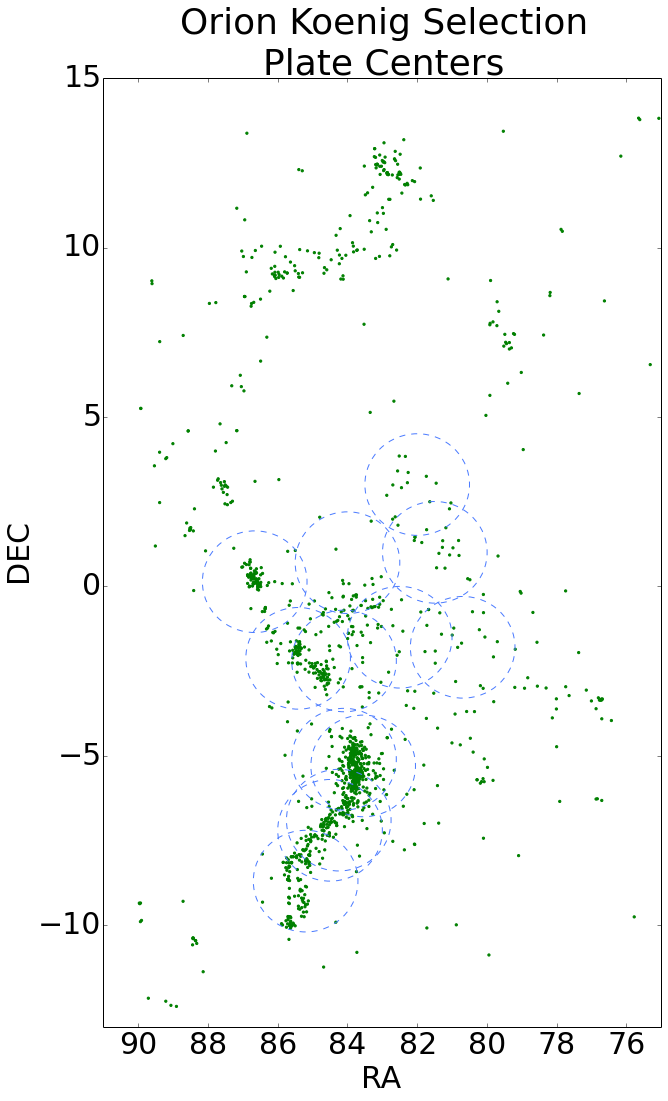

In [5]:
#Plot selected sources with plate centers
plt.scatter(orion['ra'], orion['dec'], marker = '.', color = 'green')

#APOGEE2 Circles
circle6=plt.Circle((86.66,0.1379),1.5,color='#4c7cff', fill = False, linestyle = 'dashed')
circle7=plt.Circle((85.415,-2.124),1.5,color='#4c7cff', fill = False, linestyle = 'dashed')
circle8=plt.Circle((84.099,-2.201),1.5,color='#4c7cff', fill = False, linestyle = 'dashed')
circle9=plt.Circle((84.0,0.7),1.5,color='#4c7cff', fill = False, linestyle = 'dashed')
circle10=plt.Circle((82.502,-1.5011),1.5,color='#4c7cff', fill = False, linestyle = 'dashed')
circle11=plt.Circle((80.697,-1.798),1.5,color='#4c7cff', fill = False, linestyle = 'dashed')
circle12=plt.Circle((81.496,1.005),1.5,color='#4c7cff', fill = False, linestyle = 'dashed')
circle13=plt.Circle((82.001,3.005),1.5,color='#4c7cff', fill = False, linestyle = 'dashed')
#circle14=plt.Circle((84.517,-7.034),1.5,color='#4c7cff', fill = False, linestyle = 'dashed')
circle15=plt.Circle((84.1, -5.1),1.5,color='#4c7cff', fill = False, linestyle ='dashed')
circle16=plt.Circle((83.55, -5.3),1.5,color= '#4c7cff', fill = False, linestyle = 'dashed')
circle17=plt.Circle((84.25, -6.9),1.5,color='#4c7cff', fill = False, linestyle = 'dashed')
circle18=plt.Circle((84.5, -7.2),1.5,color='#4c7cff', fill = False, linestyle = 'dashed')
circle19=plt.Circle((85.2, -8.7),1.5,color='#4c7cff', fill = False, linestyle = 'dashed')


fig = plt.gcf()
fig.gca().add_artist(circle6)
fig.gca().add_artist(circle7)
fig.gca().add_artist(circle8)
fig.gca().add_artist(circle9)
fig.gca().add_artist(circle10)
fig.gca().add_artist(circle11)
fig.gca().add_artist(circle12)
fig.gca().add_artist(circle13)
#fig.gca().add_artist(circle14)

fig.gca().add_artist(circle15)
fig.gca().add_artist(circle16)
fig.gca().add_artist(circle17)
fig.gca().add_artist(circle18)
fig.gca().add_artist(circle19)

plt.title("Orion Koenig Selection\nPlate Centers")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.xlim(91,75)
plt.ylim(-13,15)
plt.rc('font', size = 30)
fig = plt.gcf()
fig.set_size_inches(10, 17)
#fig.savefig('../../KoenigSelectedCatalogs/Orion/Koenig_with_Plate_Centers.pdf')

In [13]:
# count the number of sources inside a plate, given the plate center
from astropy import units as u
from astropy.coordinates import SkyCoord  


PlateRA = [86.66,85.415, 84.099, 84.0, 82.502, 80.697, 81.496, 82.001, 84.1, 83.55, 84.25, 84.5, 84.2]
PlateDEC = [0.1379, -2.124, -2.201, 0.7, -1.5011, -1.798, 1.005, 3.005, -5.1, -5.3, -6.9, -7.2, -8.7]
totalPlate = []

for i in range(len(PlateRA)):
    cenRa = PlateRA[i]
    cenDec = PlateDEC[i]
    c1 = SkyCoord(cenRa, cenDec, unit='deg')

    total = 0
    for i in range(len(orion)):
        c2 = SkyCoord(orion['ra'][i], orion['dec'][i], unit = 'deg')
        if (c1.separation(c2).degree <=1.5):
            total = total +1
            
    totalPlate.append(total)     
            
output = open('../../KoenigSelectedCatalogs/Orion/Orion_PlateCount.txt', 'w')
output.write('Plate_Ra\tPlate_Dec\tSourceCount')
for i in range(len(PlateRA)):
    line = '\n'+str(PlateRA[i])+'\t'+str(PlateDEC[i])+'\t'+str(totalPlate[i])
    output.write(line)
    
output.close()

In [10]:
output = open('../../KoenigSelectedCatalogs/Orion/Orion_PlateCount.txt', 'w')
output.write('Plate_Ra\tPlate_Dec\tSourceCount')
for i in range(len(PlateRA)):
    line = '\n'+str(PlateRA[i])+'\t'+str(PlateDEC[i])+'\t'+str(totalPlate[i])
    output.write(line)
    
output.close()

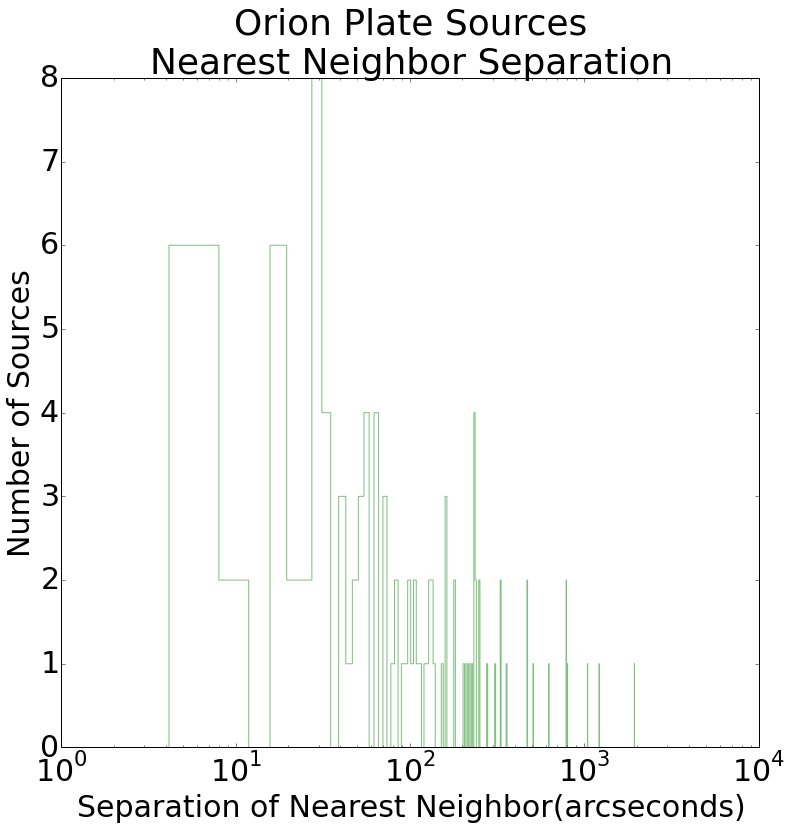

In [37]:
# find the number of collisions on the plate by plotting a histogram of the nearest neighbor
#separation. The number of these that are 1'' or lower are collisons!
PlateSources = SkyCoord(orion['ra'][totalPlate], orion['dec'][totalPlate], unit = 'deg')
indx, dist, dist3d = PlateSources.match_to_catalog_sky(PlateSources, 2)


plt.hist(dist.arcsecond, alpha = 0.5, color = 'green', bins = 500, histtype = 'step')
#plt.yscale('log')
plt.xscale('log')
#plt.xlim(0,100)
plt.xlabel('Separation of Nearest Neighbor(arcseconds)')
plt.ylabel('Number of Sources')
plt.title('Orion Plate Sources \nNearest Neighbor Separation')
fig = plt.gcf()
plt.rc('font', size = 30)
fig.set_size_inches(12.5, 12)